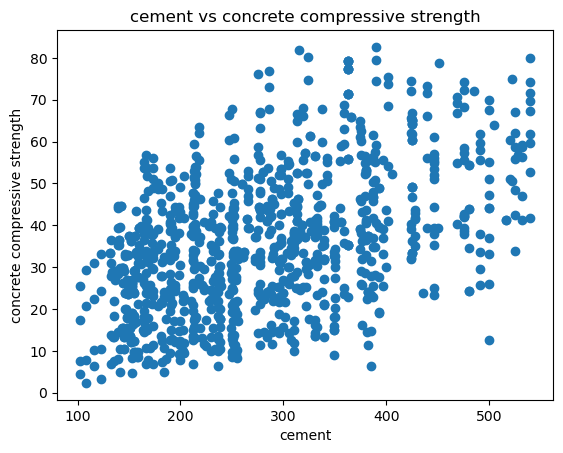

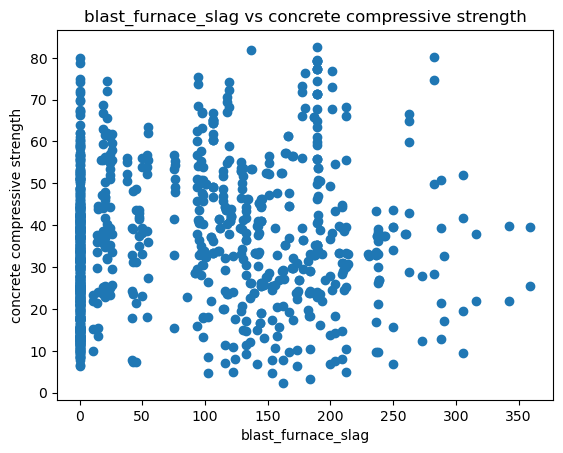

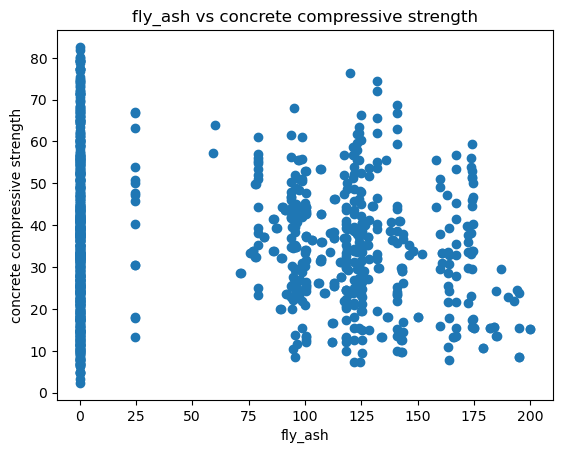

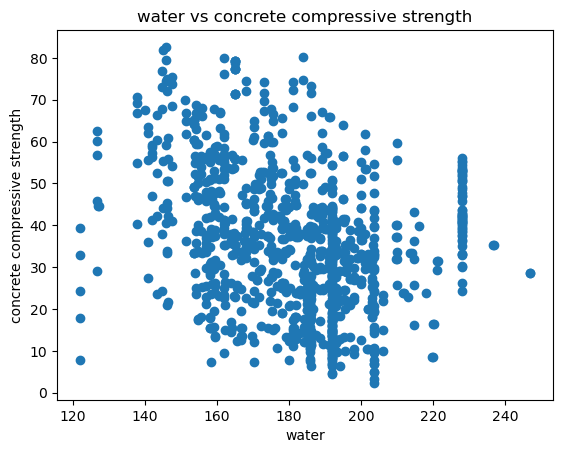

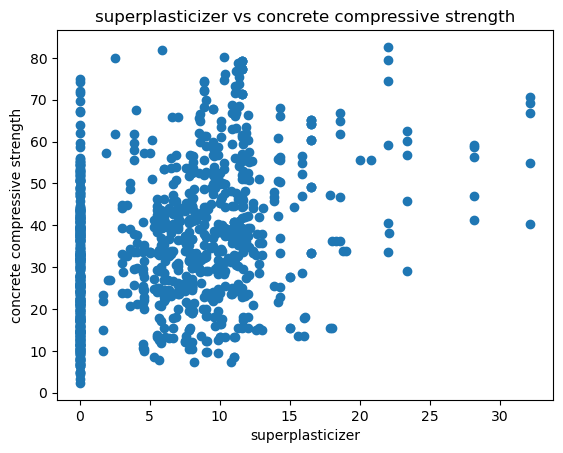

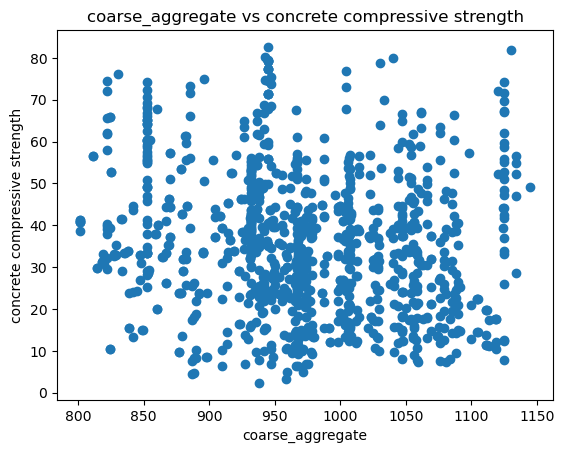

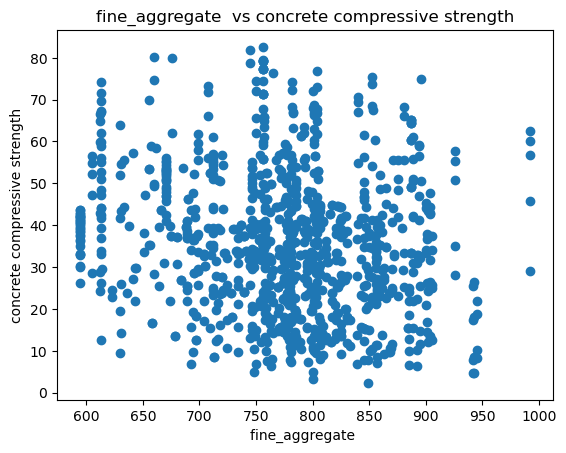

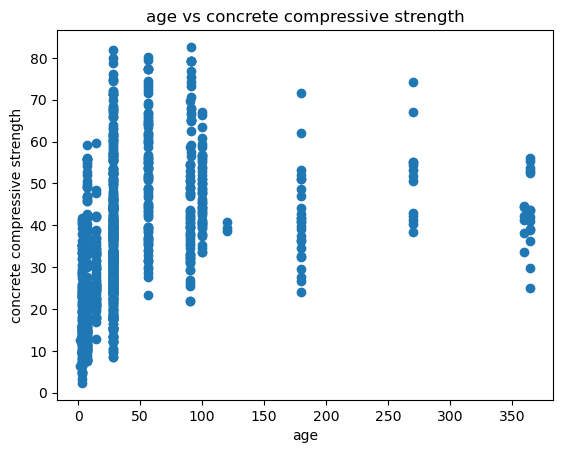

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("/home/mllab/Downloads/concrete_data.csv")

features=df.columns[:-1]
target=df.columns[-1]

for feature in features:
    plt.scatter(df[feature],df[target])
    plt.ylabel('concrete compressive strength')
    plt.xlabel(feature)
    plt.title(f"{feature} vs concrete compressive strength")
    plt.show()
    


In [14]:
X=df[features].values
y=df[target].values
m=len(y)
X=(X-X.mean(axis=0))/X.std(axis=0)
X=np.c_[np.ones(m),X]

In [40]:
def gradientdescent(X,y,alpha,iterations):
    m,n=X.shape
    theta=np.zeros(n)
    cost_list=[]
    for k in range(iterations):
        prediction=np.dot(X,theta)
        error=prediction-y
        cost=(1/(2*m))*np.sum(error**2)
        theta=theta-(alpha*(np.dot(X.T,error))/m)
        cost_list.append(cost)
    return theta, cost_list

alphas=[0.1, 0.01, 0.001, 0.0001, 0.00001]
iterations=1000
theta_values=[]
cost_histories=[]

for alpha in alphas:
    theta,cost_list=gradientdescent(X,y,alpha,iterations)
    theta_values.append(theta)
    cost_histories.append(cost_list)


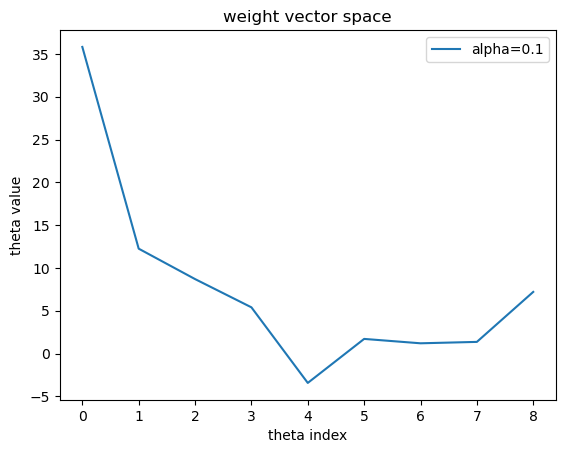

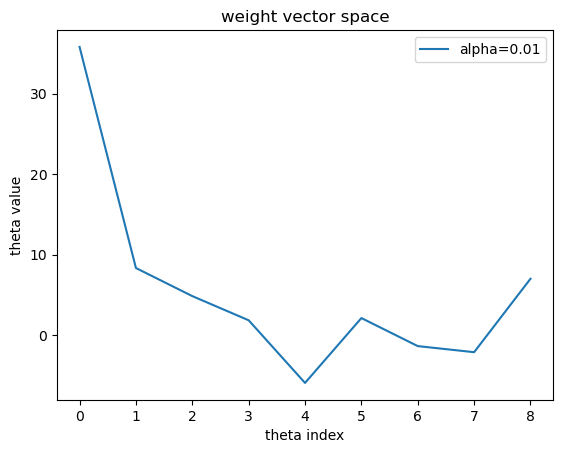

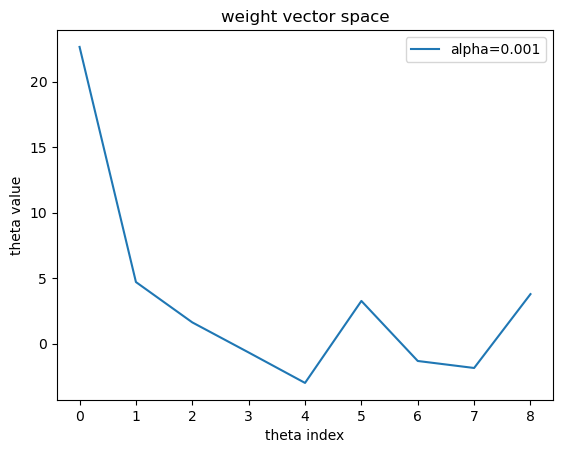

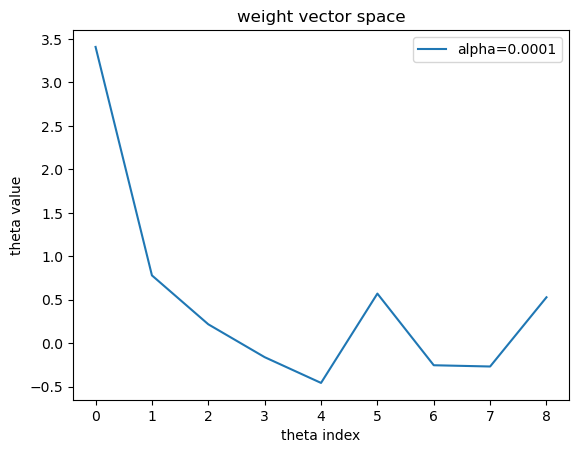

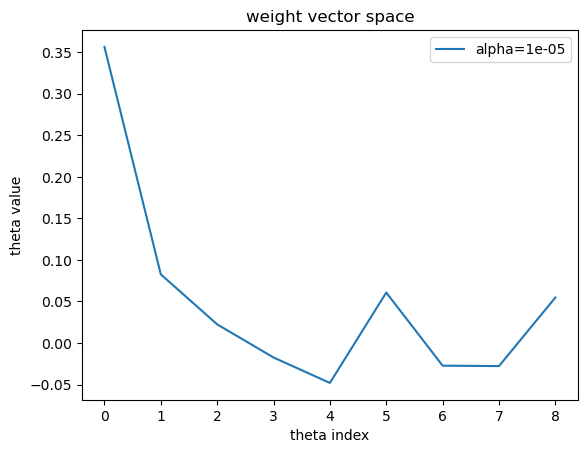

In [53]:
def plot_weight(theta_history):
    for i in range(len(theta_history)):
        theta=theta_history[i]
        plt.plot(range(len(theta)),theta, label=f"alpha={alphas[i]}")
        plt.xlabel("theta index")
        plt.ylabel("theta value")
        plt.title("weight vector space")
        plt.legend()
        plt.show()

plot_weight(theta_values)


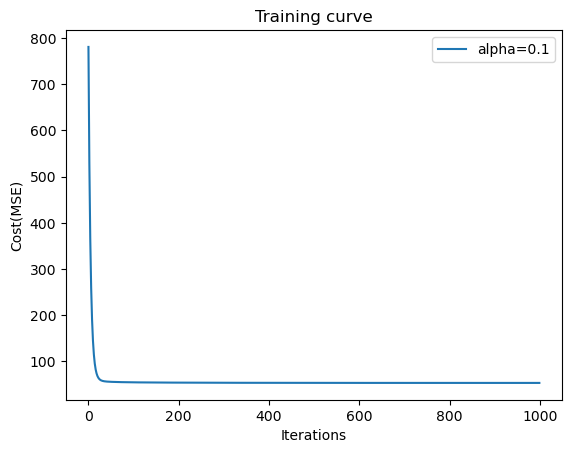

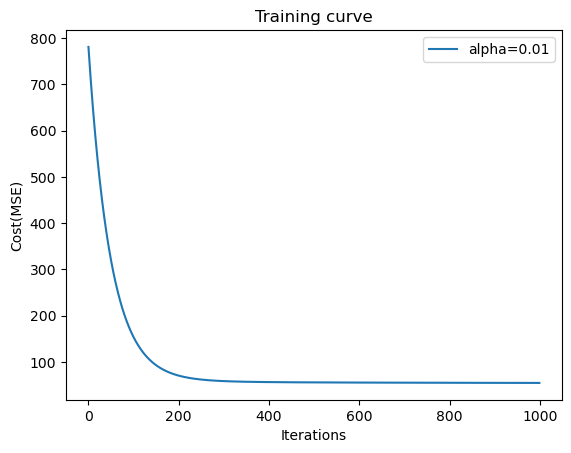

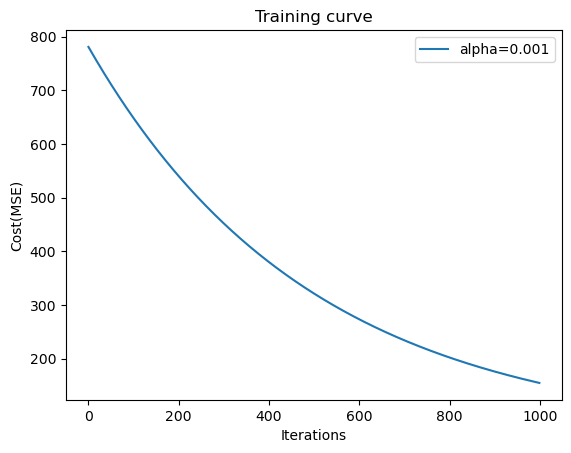

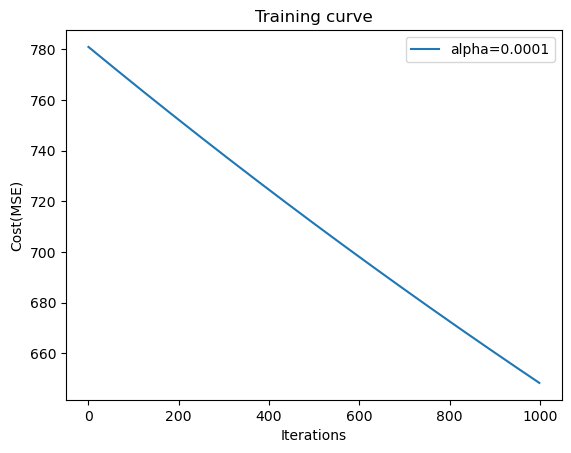

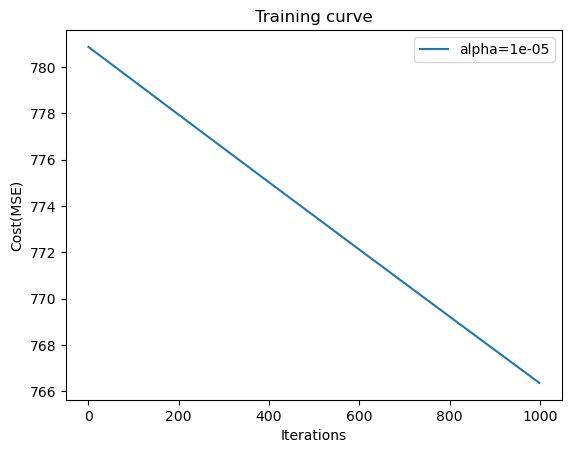

In [55]:
def plot_trainingcurve(cost_history, alpha):
    plt.plot(range(len(cost_history)),cost_history,label=f"alpha={alphas[i]}")
    plt.xlabel("Iterations")
    plt.ylabel("Cost(MSE)")
    plt.title("Training curve")
    plt.legend()
    plt.show()

for i,alpha in enumerate(alphas):
    plot_trainingcurve(cost_histories[i],alpha)

In [61]:
def predict(X_new, theta):
    return np.dot(X_new, theta)

X_test=np.array([[1,14,13,10,19,6,10,10,99],[1,140,123,160,119,16,120,150,91]])
y_pred=predict(X_test,theta_values[-1])
print(f"Predictions for test cases : {y_pred}")

Predictions for test cases : [5.94409852 4.65656482]
